# Linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Data/Ecommerce Customers.csv')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


using plotting to create a graph on the time on website and yearly amount spent?

Exploring the data!

C:\Users\hsturlan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


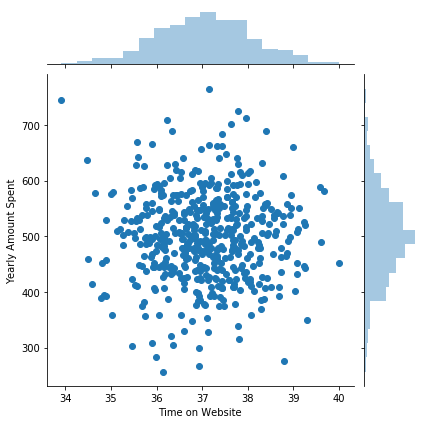

In [8]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, kind='scatter')

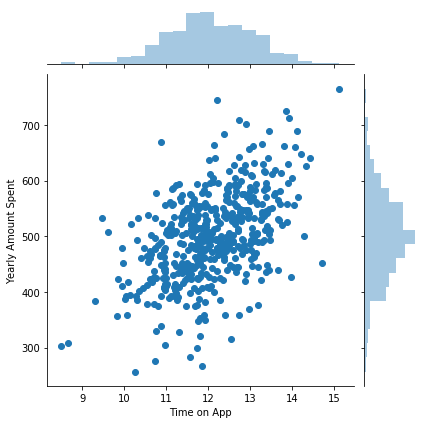

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, kind='scatter')

C:\Users\hsturlan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


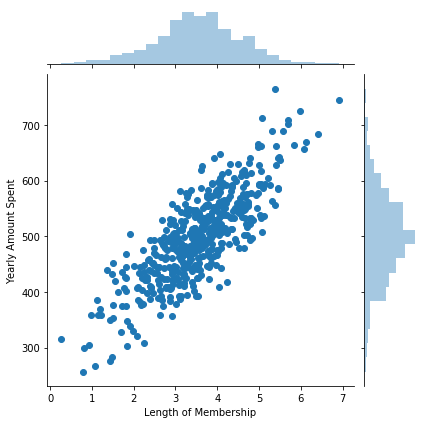

In [13]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=df, kind='scatter')

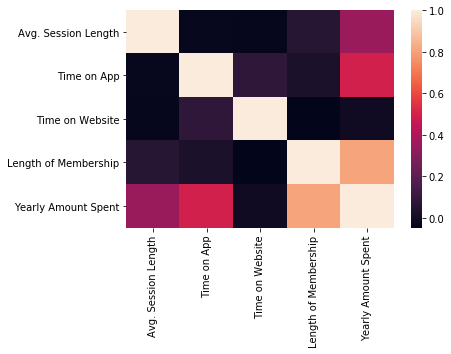

In [14]:
sns.heatmap(df.corr())

We see that the high correlation is between Length of Membership and Yearly Amount Spent!

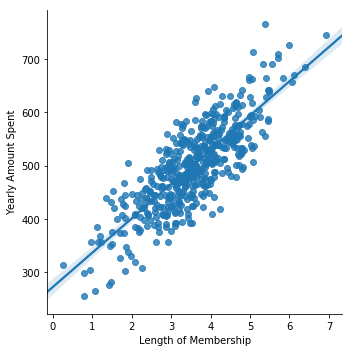

In [15]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

In [16]:
# training and testing data

In [17]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [18]:
x=df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

We wanna know based on all info about costumer how much money will they spent?

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=0)

Now we train model!!

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predicting test data

In [24]:
pred=model.predict(x_test)

In [25]:
pred

array([438.05361824, 489.88569198, 370.69103491, 514.760391  ,
       496.7189217 , 451.55278137, 457.78867583, 336.67939991,
       527.81474016, 663.59455653, 559.9744863 , 526.04623292,
       551.99421026, 456.63948791, 450.23568445, 432.06183962,
       563.23217826, 408.88887454, 599.34396339, 486.90344586,
       715.98855998, 496.94092608, 411.57431473, 555.98451537,
       550.67872493, 398.39939771, 420.89896272, 395.80398185,
       548.01986143, 463.57065873, 558.50166416, 505.04153589,
       505.69744364, 463.9745016 , 425.90773104, 400.61232527,
       503.64365781, 430.32931831, 570.24273703, 422.00772918,
       487.84508367, 602.03000651, 615.86576796, 589.22540325,
       449.89751618, 379.99185043, 558.51374868, 462.84914541,
       502.36523082, 401.25888527, 524.46131262, 416.58817719,
       576.56973214, 477.79844616, 456.89273381, 398.0612513 ,
       564.95710004, 305.11202178, 562.18988371, 477.14131612,
       498.70567984, 434.25965119, 464.87939435, 577.22

Text(0, 0.5, 'predicted')

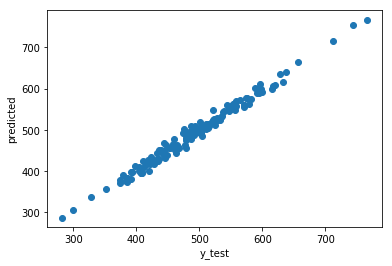

In [26]:
plt.scatter(y_test,pred)
plt.xlabel('y_test')
plt.ylabel('predicted')

Evaulating

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.8513771708614435
MSE: 94.55779479273288
RMSE: 9.724083236620967
